# HW_2주차

## titanic.csv 파일 정의

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns

In [60]:
features = pd.read_csv("C:/AI_HW/titanic.csv", index_col = 0)

In [61]:
features

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## 결측치 제거

In [62]:
#결측치 개수 확인
features.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [63]:
#결측치 제거(결측값이 많은 'Age'와 'Cabin' 행 제거)
features.dropna(subset = ['Age', 'Cabin'],inplace=True)

In [64]:
#결측치 제거 확인
features.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    2
dtype: int64

# Survived를 타겟 레이블로 삼아서 EDA 수행

## 1. Pclass 레이블별 개수 및 차트표시

Text(0.5, 1.0, 'Pclass gragh')

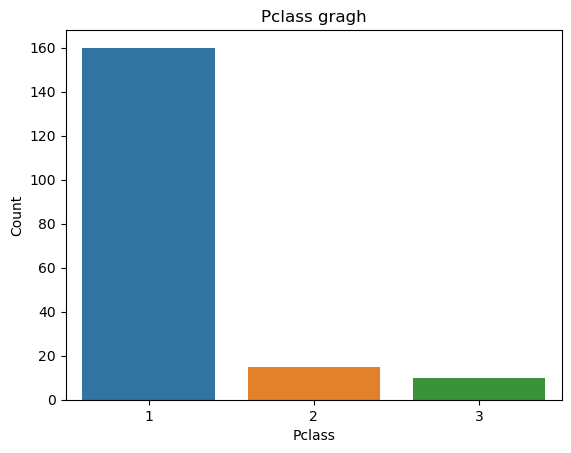

In [65]:
import matplotlib.pyplot as plt

sns.countplot(data = features, x="Pclass")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.title("Pclass gragh")

## 2. 생존자와 사망자 총 숫자 및 차트표시

Text(0.5, 1.0, 'Survived People')

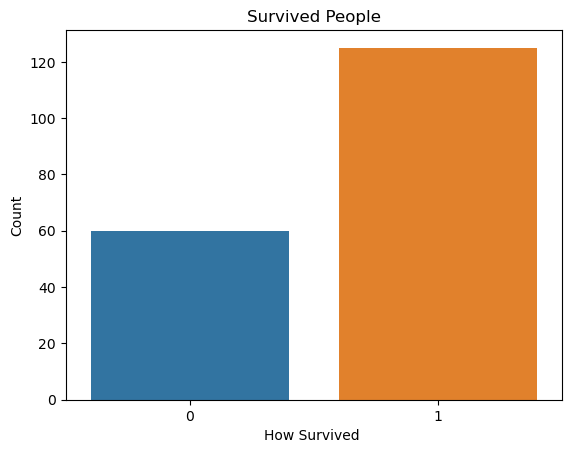

In [66]:
sns.countplot(data=features, x="Survived")
plt.xlabel("How Survived ")
plt.ylabel("Count")
plt.title("Survived People")

## 3. 성별(Sex), 티켓클래스(Pclass), 생존여부(Survived) 상관관계 분석

In [73]:
#성별(Sex)을 숫자로 (남:0/여:1) 변환
def male_or_female(x):
    if x == "male":
        return 0
    elif x == "female":
        return 1

features["Sex"] = features["Sex"].apply(male_or_female)

In [74]:
features.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.037227,0.535727,-0.244604,0.100339,0.018723,0.134019
Pclass,-0.037227,1.000000,0.041725,-0.307590,-0.100324,0.049894,-0.315069
Sex,0.535727,0.041725,1.000000,-0.172307,0.095344,0.081832,0.129871
Age,-0.244604,-0.307590,-0.172307,1.000000,-0.161625,-0.274813,-0.091542
SibSp,0.100339,-0.100324,0.095344,-0.161625,1.000000,0.258993,0.285492
Parch,0.018723,0.049894,0.081832,-0.274813,0.258993,1.000000,0.388783
Fare,0.134019,-0.315069,0.129871,-0.091542,0.285492,0.388783,1.000000


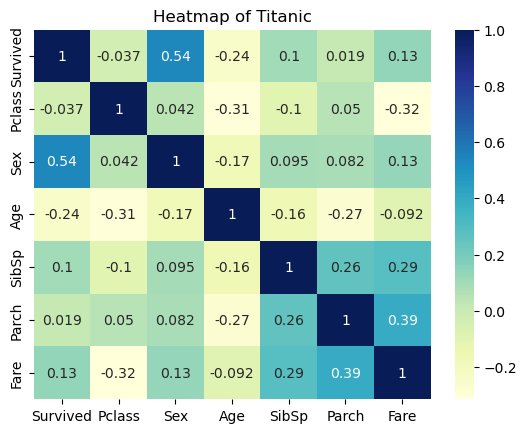

In [83]:
sns.heatmap(features.corr(), cmap='YlGnBu', annot = True)
plt.title('Heatmap of Titanic')

plt.show()

## 4. X_train, y_ytrain, X_test, y_test로 나누고 생존여부(Survived)에 따라 각각 분류(SVM, LR, DT, RT, KNN)

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

x = features
y = features['Survived']

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=100)
print(type(x_train))
print(type(y_train))
print('x_train수:',x_train.shape)
print('x_test수:',x_test.shape)
print('y_train수:',y_train.shape)
print('y_test수:',y_test.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
x_train수: (92, 11)
x_test수: (93, 11)
y_train수: (92,)
y_test수: (93,)


### 1) SVM

In [91]:
from sklearn import svm

### 2) LR

### 3) DT

### 4) RT

### 5) KNN